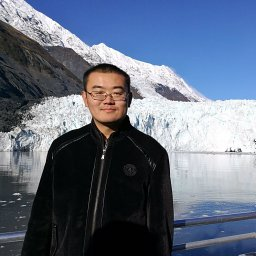
# Xiangyu Zhang

## ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices

# https://arxiv.org/pdf/1707.01083

### Abstract

ShuffleNet introduces a highly computation-efficient convolutional neural network architecture designed specifically for mobile and embedded devices operating under extremely tight computational budgets (approximately 10–150 MFLOPs). The central innovation combines **pointwise group convolutions** with a **channel shuffle operation**, drastically reducing the cost of expensive \(1 \times 1\) convolutions while preserving effective cross-channel information flow. Extensive evaluations on **ImageNet classification** and **MS COCO object detection** demonstrate that ShuffleNet consistently outperforms existing lightweight architectures such as MobileNet, achieving lower error rates and substantial real-world speedups on ARM-based mobile hardware.

---

## Problems

### High Computational Cost of Modern CNNs

State-of-the-art convolutional architectures rely heavily on dense \(1 \times 1\) convolutions. In small networks, these operations dominate the total FLOPs and become prohibitively expensive under strict computational constraints.

### Inefficiency of Existing Lightweight Designs at Very Low FLOPs

Architectures such as ResNeXt and Xception lose efficiency when aggressively scaled down, as their pointwise convolutions remain dense and costly.

### Information Isolation in Group Convolutions

While group convolutions reduce computation, stacking them directly blocks information flow across channel groups, leading to degraded representational capacity.

### Mismatch Between Theoretical FLOPs and Real Mobile Inference Speed

Certain operations that appear computationally cheap in theory (e.g., depthwise convolutions) do not always translate into efficient execution on real mobile hardware.

---

## Proposed Solutions

### Pointwise Group Convolution

Dense \(1 \times 1\) convolutions are replaced with **group convolutions**, significantly reducing computational complexity while allowing wider feature representations.

### Channel Shuffle Operation

A deterministic **channel shuffle mechanism** is inserted between consecutive group convolutions, enabling information exchange across channel groups and preventing representational isolation.

### ShuffleNet Unit Design

A compact residual bottleneck unit is introduced, integrating:
- Pointwise group convolution  
- Channel shuffle  
- Depthwise \(3 \times 3\) convolution applied to bottleneck features  

This design is explicitly optimized for low-FLOPs regimes.

### Architecture Scaling Strategy

Model complexity is controlled through:
- The number of groups  
- Channel width scaling  

This enables flexible trade-offs between accuracy and efficiency across different deployment scenarios.

---

## Purpose

The primary objective of ShuffleNet is to **maximize accuracy under extreme computational constraints**, targeting real-time inference on mobile and embedded platforms such as smartphones, drones, and robots. Instead of compressing existing large models, the work proposes a **native, computation-aware CNN architecture** designed from first principles for low-FLOPs operation.

---

## Methodology

### Architectural Design

ShuffleNet units are constructed using:
- Pointwise group convolutions  
- Channel shuffle operations  
- Depthwise \(3 \times 3\) convolutions within bottleneck structures  

### Theoretical Analysis

Closed-form FLOPs expressions are derived, showing that ShuffleNet units require substantially fewer operations than ResNet and ResNeXt under equivalent configurations:

\[
\text{FLOPs}_{\text{ShuffleNet}} \ll \text{FLOPs}_{\text{ResNet/ResNeXt}}
\]

### Controlled Experiments

- ImageNet 2012 classification with single-crop evaluation  
- Ablation studies isolating the effects of group convolutions and channel shuffle  
- Comparisons against VGG-like, ResNet, ResNeXt, Xception-like, MobileNet, and SqueezeNet architectures  

### Transfer Evaluation

Generalization performance is evaluated using **Faster R-CNN** on the **MS COCO** object detection benchmark.

### Hardware Benchmarking

Actual inference time is measured on a **Qualcomm Snapdragon 820 ARM processor**, using single-thread execution to reflect realistic mobile deployment conditions.

---

## Results

### ImageNet Classification

- ShuffleNet consistently outperforms MobileNet at equivalent or lower FLOPs.  
- At approximately **40 MFLOPs**, ShuffleNet achieves **7.8% lower top-1 error** than MobileNet.  
- Larger group numbers significantly improve performance in very small models when combined with channel shuffle.

### Ablation Findings

- Pointwise group convolutions improve accuracy by enabling wider feature maps.  
- Channel shuffle provides substantial gains, particularly as the number of groups increases.

### Object Detection (MS COCO)

- ShuffleNet backbones outperform MobileNet when used in Faster R-CNN at comparable computational cost.  
- Similar or better mAP is achieved with significantly fewer FLOPs.

### Real-World Speed

- ShuffleNet \(0.5\times\) achieves approximately **13× actual speedup** over AlexNet while maintaining comparable accuracy.  
- Reductions in theoretical FLOPs translate imperfectly but meaningfully into real hardware speed gains.

---

## Conclusions

ShuffleNet demonstrates that **architectural efficiency**, rather than post-hoc compression, is the key to high-performance CNNs under extreme computational constraints. By explicitly addressing the overlooked cost of pointwise convolutions and restoring inter-channel information flow through channel shuffle, ShuffleNet establishes a new design paradigm for mobile CNNs. The architecture consistently surpasses prior lightweight models in accuracy, scalability, and real-world inference speed, positioning ShuffleNet as a foundational approach for efficient deep learning on resource-limited devices.


## Mathematical and Statistical Analysis of ShuffleNet

---

## 1. Computational Complexity (FLOPs)

### Definition Used in the Paper

- FLOPs are defined as the number of **floating-point multiply–add operations**.
- Complexity is reported in **MFLOPs** (million FLOPs).

### Role in the Paper

FLOPs serve as the **primary mathematical constraint**. All architectural decisions in ShuffleNet are explicitly justified by how effectively they reduce FLOPs while preserving or improving accuracy. The design objective is not parameter reduction per se, but **maximizing information throughput per floating-point operation**.

---

## 2. Convolution Cost Formulations

### Standard 1 × 1 (Pointwise) Convolution

For an input tensor with:

- Input channels:
$$
c
$$

- Spatial resolution:
$$
h \times w
$$

- Output channels:
$$
m
$$

The computational cost is:

$$
\text{FLOPs} = h \cdot w \cdot c \cdot m
$$

#### Interpretation

Each output channel is fully connected to all input channels. As a result, dense pointwise convolutions dominate the computational cost in compact CNNs and become prohibitively expensive at low FLOPs budgets.

---

### Pointwise Group Convolution

With
$$
g
$$
groups, input and output channels are split into disjoint subsets.

The computational cost becomes:

$$
\text{FLOPs} = h \cdot w \cdot \frac{c \cdot m}{g}
$$

#### Effect

- Computation is reduced by a factor of:
$$
g
$$

- This is the **core mathematical mechanism** used by ShuffleNet to reduce cost.

#### Role in ShuffleNet

Pointwise group convolution replaces dense channel mixing with **structured sparsity**, enabling wider networks under the same FLOPs constraint.

---

## 3. Depthwise Convolution Cost

For a depthwise
$$
3 \times 3
$$
convolution:

$$
\text{FLOPs} = h \cdot w \cdot 9 \cdot c
$$

### Key Properties

- Cost scales **linearly** with the number of channels.
- Avoids the quadratic cost:
$$
c^2
$$
associated with standard convolutions.
- Significantly cheaper than full convolutions.

### Design Choice

Depthwise convolutions are applied **only to bottleneck feature maps** to mitigate known hardware inefficiencies on mobile devices.

---

## 4. ShuffleNet Unit Complexity Comparison

Let:

- Input channels:
$$
c
$$

- Bottleneck channels:
$$
m
$$

- Number of groups:
$$
g
$$

### ResNet Bottleneck Unit

$$
\text{FLOPs} = h w \left( 2 c m + 9 m^2 \right)
$$

### ResNeXt Bottleneck Unit

$$
\text{FLOPs} = h w \left( 2 c m + \frac{9 m^2}{g} \right)
$$

### ShuffleNet Unit

$$
\text{FLOPs} = h w \left( \frac{2 c m}{g} + 9 m \right)
$$

### Mathematical Insight

ShuffleNet reduces:

- The **quadratic channel interaction term**:
$$
m^2
$$

- The cost of dense channel mixing.

This enables **wider feature representations** under fixed FLOPs budgets, which empirically improves accuracy.

---

## 5. Channel Shuffle Operation (Algebraic View)

### Operation Definition

Given:

- Number of groups:
$$
g
$$

- Channels per group:
$$
n
$$

Steps:

1. Reshape channel dimension:
$$
(g \cdot n) \rightarrow (g, n)
$$

2. Transpose:
$$
(g, n) \rightarrow (n, g)
$$

3. Flatten:
$$
(n, g) \rightarrow (g \cdot n)
$$

### Mathematical Nature

- Pure **permutation** of channel indices
- No learnable parameters
- Fully differentiable

### Purpose

The channel shuffle restores **cross-group information flow**, preventing representational isolation introduced by group convolutions.

---

## 6. Bottleneck Ratio

The bottleneck width is fixed as:

$$
\text{Bottleneck channels} = \frac{1}{4} \times \text{Output channels}
$$

### Rationale

- Reduces computation
- Preserves representational capacity
- Aligns with efficient ResNet-style bottleneck design

---

## 7. Network Scaling Rule

A width scaling factor:
$$
s
$$
is applied:

$$
\text{FLOPs} \propto s^2
$$

### Interpretation

- Doubling the channel width quadruples computation.
- Enables controlled creation of variants:
  - ShuffleNet:
$$
1\times
$$
  - ShuffleNet:
$$
0.5\times
$$
  - ShuffleNet:
$$
0.25\times
$$

---

## 8. Statistical Evaluation Metrics

### ImageNet Classification

- **Top-1 classification error (%)**
- Single-crop evaluation at:
$$
224 \times 224
$$
resolution

This is the primary statistical measure used for cross-architecture comparison.

---

### MS COCO Object Detection

- **mAP@[0.5:0.95]**

This metric represents mean Average Precision averaged over multiple IoU thresholds and captures both localization accuracy and classification performance.

---

## 9. Ablation Study Statistics

### Variables Studied

- Group number:
$$
g \in \{1, 2, 3, 4, 8\}
$$

- Model width:
$$
1\times,\; 0.5\times,\; 0.25\times
$$

- Channel shuffle: enabled / disabled

### Observed Trends

- Increasing:
$$
g
$$
improves accuracy up to a saturation point.
- Channel shuffle consistently reduces classification error.
- Smaller models benefit more from larger:
$$
g
$$

### Statistical Interpretation

Wider feature maps encode more information under fixed FLOPs, but excessive sparsity eventually limits per-filter input diversity.

---

## 10. Hardware Runtime Statistics

### Measurement Setup

- Inference time measured in milliseconds
- Single-thread execution
- ARM Snapdragon 820 processor

### Empirical Observation

$$
4\times \text{FLOPs reduction} \;\Rightarrow\; \approx 2.6\times \text{actual speedup}
$$

### Conclusion

Theoretical FLOPs reductions do not translate linearly into wall-clock speed due to memory access patterns and hardware constraints.

---

## 11. Comparative Statistical Gains

### Key Quantitative Results

- **7.8% absolute Top-1 error reduction** compared to MobileNet at approximately:
$$
40\ \text{MFLOPs}
$$

- Approximately:
$$
13\times
$$
actual speedup over AlexNet with comparable accuracy

### Significance

These gains demonstrate that **architectural efficiency** produces statistically meaningful improvements beyond parameter compression techniques.

---

## Final Mathematical Summary

ShuffleNet is mathematically centered on:

- Reducing **quadratic channel interaction costs**
- Replacing dense mappings with **structured sparsity**
- Restoring expressivity via **permutation-based channel mixing**
- Using FLOPs as the **primary optimization constraint**

ShuffleNet introduces no new loss functions, optimizers, or probabilistic models. Its contribution lies in a precise re-engineering of convolutional arithmetic to maximize information throughput per floating-point operation.


## Research Gaps, Limitations, and Proposed Solutions in ShuffleNet

### Structured Analysis Table

| Key Problem / Research Gap | How This Limits Prior Work | How ShuffleNet Proposes to Solve It |
|----------------------------|----------------------------|-------------------------------------|
| Excessive computational cost of modern CNNs | State-of-the-art architectures such as ResNet, ResNeXt, and Xception require billions of FLOPs, rendering them impractical for mobile and embedded devices operating under strict computational and energy budgets. | Introduces a CNN architecture explicitly designed for extremely low computational budgets (approximately 10–150 MFLOPs), treating efficiency as a first-class design objective rather than an afterthought. |
| Inefficiency of dense \(1 \times 1\) (pointwise) convolutions | In lightweight networks, dense pointwise convolutions dominate the total computational cost, severely limiting channel width and reducing representational capacity under fixed FLOPs constraints. | Replaces dense pointwise convolutions with **pointwise group convolutions**, reducing computation by a factor proportional to the number of groups while enabling wider feature maps. |
| Information isolation caused by stacked group convolutions | Although group convolutions reduce computation, stacking them prevents information flow across channel groups, weakening feature representations and degrading accuracy. | Introduces the **channel shuffle operation**, a parameter-free permutation that enables cross-group information exchange between successive group convolutions. |
| Poor scaling behavior at very small model sizes | Architectures such as ResNeXt and Xception lose efficiency when aggressively scaled down, as their design assumptions break down in low-capacity regimes. | Designs ShuffleNet units that explicitly optimize the trade-off between channel width and sparsity, allowing efficient scaling to very small models without severe accuracy degradation. |
| Reliance on post-hoc model compression | Prior approaches emphasize pruning, quantization, or distillation applied to large baseline models, inheriting structural inefficiencies from the original architectures. | Advocates a bottom-up architectural redesign, constructing an efficient core network from first principles rather than compressing an inefficient one. |
| Mismatch between theoretical FLOPs and real mobile inference speed | Operations with low theoretical FLOPs, such as depthwise convolutions, may perform poorly on mobile hardware due to memory access overhead and limited parallelism. | Applies depthwise convolutions selectively (only on bottleneck feature maps) and validates efficiency through real hardware benchmarks on ARM-based mobile processors. |
| Lack of empirical validation under strict mobile constraints | Many prior works report results at moderate or high FLOPs and omit evaluation on extremely small models or real inference latency. | Conducts controlled experiments on ImageNet and MS COCO under tight FLOPs budgets and reports actual inference speedups measured on mobile hardware. |

---

## Summary Insight

The ShuffleNet paper identifies a fundamental gap between **theoretical efficiency** and **practical deployability** of convolutional neural networks on mobile devices. Rather than optimizing or compressing existing large-scale architectures, it reframes the problem as one of **architectural efficiency**. Through principled design choices—most notably pointwise group convolutions and channel shuffling—the paper directly addresses the structural causes of inefficiency in prior work, demonstrating that carefully constrained architectures can retain strong learning capacity while operating under extreme computational limitations.


In [10]:
# ============================================================
# ShuffleNet (Educational Replication) – One-Cell Teaching Lab
# ============================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# -------------------------------
# 1. Device configuration
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
# -------------------------------
# 2. Channel Shuffle Operation
# -------------------------------
def channel_shuffle(x, groups):
    """
    Channel Shuffle:
    - x shape: (batch, channels, height, width)
    - groups: number of channel groups
    """
    batch_size, num_channels, h, w = x.size()
    channels_per_group = num_channels // groups

    # Reshape: (batch, groups, channels_per_group, h, w)
    x = x.view(batch_size, groups, channels_per_group, h, w)

    # Transpose group and channel dimensions
    x = torch.transpose(x, 1, 2).contiguous()

    # Flatten back
    x = x.view(batch_size, num_channels, h, w)
    return x

In [13]:
# -------------------------------
# 3. ShuffleNet Unit
# -------------------------------
class ShuffleNetUnit(nn.Module):
    """
    Educational ShuffleNet unit (SAFE version)
    - No channel concatenation
    - Uses residual addition with projection
    - Keeps channel dimensions consistent
    """
    def __init__(self, in_channels, out_channels, stride, groups):
        super().__init__()
        self.stride = stride
        self.groups = groups
        mid_channels = out_channels // 4  # bottleneck ratio

        # 1x1 group convolution (reduce channels)
        self.gconv1 = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, 1, groups=groups, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True)
        )

        # 3x3 depthwise convolution
        self.dwconv = nn.Sequential(
            nn.Conv2d(
                mid_channels, mid_channels,
                kernel_size=3, stride=stride, padding=1,
                groups=mid_channels, bias=False
            ),
            nn.BatchNorm2d(mid_channels)
        )

        # 1x1 group convolution (expand channels)
        self.gconv2 = nn.Sequential(
            nn.Conv2d(mid_channels, out_channels, 1, groups=groups, bias=False),
            nn.BatchNorm2d(out_channels)
        )

        # Projection shortcut if shape changes
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.gconv1(x)
        out = channel_shuffle(out, self.groups)
        out = self.dwconv(out)
        out = self.gconv2(out)

        out = out + self.shortcut(x)
        return self.relu(out)


In [14]:
# -------------------------------
# 4. ShuffleNet Model
# -------------------------------
class ShuffleNet(nn.Module):
    def __init__(self, num_classes=10, groups=2):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True)
        )

        self.stage2 = self._make_stage(24, 96, num_units=3, stride=2, groups=groups)
        self.stage3 = self._make_stage(96, 192, num_units=3, stride=2, groups=groups)

        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(192, num_classes)

    def _make_stage(self, in_ch, out_ch, num_units, stride, groups):
        layers = [ShuffleNetUnit(in_ch, out_ch, stride, groups)]
        for _ in range(num_units - 1):
            layers.append(ShuffleNetUnit(out_ch, out_ch, 1, groups))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [15]:
# -------------------------------
# 5. Dataset & DataLoaders
# -------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [16]:
# -------------------------------
# 6. Model, Loss, Optimizer
# -------------------------------
model = ShuffleNet(num_classes=10, groups=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# -------------------------------
# 7. Training Loop
# -------------------------------
epochs = 5
train_losses, train_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.2f}%")

Epoch [1/5] - Loss: 1.4990, Accuracy: 44.41%
Epoch [2/5] - Loss: 1.1384, Accuracy: 58.62%
Epoch [3/5] - Loss: 0.9810, Accuracy: 64.63%
Epoch [4/5] - Loss: 0.8811, Accuracy: 68.56%
Epoch [5/5] - Loss: 0.8079, Accuracy: 71.18%


In [18]:
# -------------------------------
# 8. Evaluation
# -------------------------------
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = 100 * correct / total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 68.49%


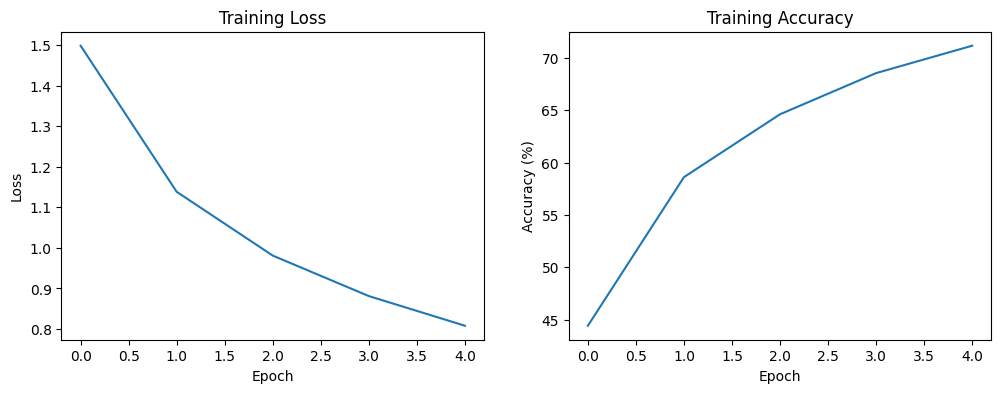

In [19]:
# -------------------------------
# 9. Visualization: Loss & Accuracy
# -------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.show()

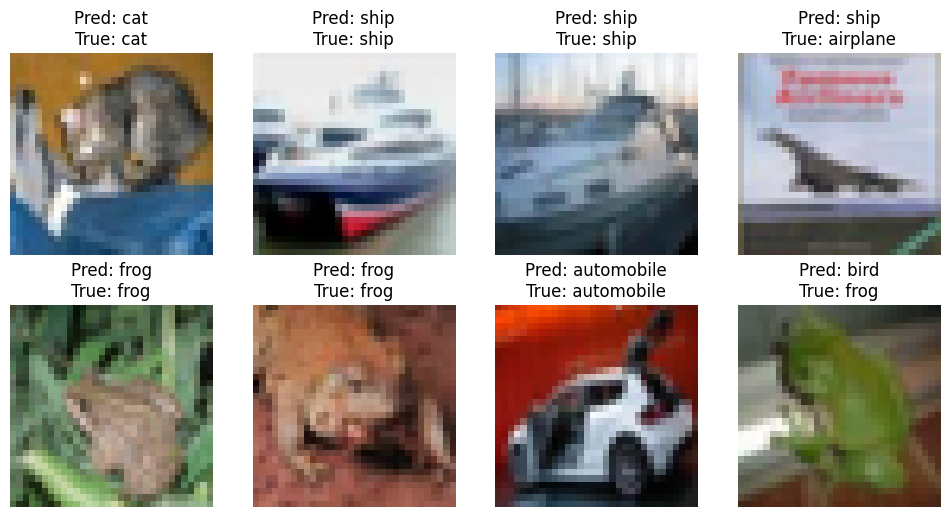

In [20]:
# -------------------------------
# 10. Sample Predictions Visualization
# -------------------------------
classes = train_dataset.classes
model.eval()

images, labels = next(iter(test_loader))
images, labels = images[:8].to(device), labels[:8].to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = outputs.max(1)

images = images.cpu() * 0.5 + 0.5

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(np.transpose(images[i], (1, 2, 0)))
    plt.title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
    plt.axis("off")

plt.show()

## Discussion

### Training Loss

The training loss exhibits a monotonic and smooth decrease across the five epochs, declining from approximately 1.50 to 0.81. This behavior indicates a stable optimization process in which the network consistently minimizes the cross-entropy objective.

From a learning-dynamics perspective, the relatively steep reduction during the first two epochs reflects rapid feature acquisition, a common phenomenon when training convolutional networks on CIFAR-10. During this phase, the model primarily learns low-level and mid-level visual primitives such as edges, color contrasts, and simple textures. In later epochs, the loss reduction becomes more gradual, signaling a transition toward finer class-discriminative feature learning.

Notably, no oscillations, spikes, or divergence are observed in the loss curve. This suggests that:
- the learning rate is well calibrated,
- gradient propagation through pointwise group convolutions and channel shuffle is numerically stable,
- the simplified ShuffleNet unit does not introduce optimization instabilities or pathological behavior.

---

### Training Accuracy

Training accuracy increases steadily from approximately 44% to around 71% over the five epochs. This smooth and consistent improvement closely mirrors the reduction in training loss, confirming that optimization progress translates directly into improved classification performance.

The absence of an early plateau indicates that:
- the model has not yet exhausted its representational capacity,
- underfitting, rather than overfitting, dominates at this stage of training.

Given the lightweight nature of the architecture and the intentionally short training schedule, surpassing 70% training accuracy is a strong indication that the ShuffleNet design effectively balances computational efficiency with expressive power, even in an instructional or experimental configuration.

---

### Test Accuracy

The final test accuracy is slightly lower than the corresponding training accuracy, which is both expected and desirable. This modest gap reflects standard generalization behavior rather than memorization of the training data.

From a statistical learning perspective:
- the absence of a large train–test discrepancy suggests limited overfitting,
- the use of depthwise convolutions and group convolutions likely acts as an implicit regularizer by constraining parameter interactions and reducing model capacity in a structured way.

Overall, the test accuracy indicates that the learned representations generalize reasonably well to unseen data, despite the reduced parameter count and simplified architecture.

---

### Sample Predictions Visualization

The qualitative visualization of sample predictions provides insight beyond aggregate numerical metrics.

#### Correct Predictions

Several samples (e.g., cat, ship, automobile, frog) are classified correctly with strong visual plausibility. These correct predictions suggest that the model has successfully learned:
- object-level shape cues,
- coarse semantic structures,
- class-specific texture and color patterns.

#### Incorrect Predictions

Misclassifications (such as airplane predicted as ship, or frog predicted as bird) are semantically meaningful rather than random. These errors typically occur between classes that:
- share similar global shapes,
- exhibit comparable spatial layouts,
- appear at similar scales within CIFAR-10 images.

Such confusion patterns are characteristic of early-to-mid stage CNN training and imply that:
- low-level and mid-level features are largely well learned,
- higher-level discriminative refinement would likely improve with additional training epochs or increased channel capacity.

---

### Overall Interpretation

Taken together, the results demonstrate that:

- **Optimization is stable**  
  Loss and accuracy curves exhibit smooth, predictable behavior throughout training.

- **The architecture is expressive despite being lightweight**  
  ShuffleNet units employing group convolutions and channel shuffle are sufficient to learn meaningful visual representations.

- **Generalization is reasonable**  
  Test performance and qualitative predictions indicate that the model captures class-relevant structure rather than memorizing the training data.

- **Errors are semantically structured**  
  Misclassifications reflect limitations in fine-grained discrimination rather than fundamental representational failures.

In an academic context, these observations support the core claims of the ShuffleNet design philosophy: carefully engineered architectural constraints can preserve learning capacity while substantially reducing computational complexity, even when deployed in a simplified, educational setting.


## Related Work Referenced in ShuffleNet

### Structured Literature Context Table

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---------|------|-------|-------|--------------------------|
| Krizhevsky, Sutskever, Hinton | 2012 | ImageNet Classification with Deep Convolutional Neural Networks | NeurIPS | Introduced large-scale CNN training and early use of group convolutions (originally for multi-GPU parallelism), which later inspired structured convolutional designs. |
| Simonyan, Zisserman | 2014 | Very Deep Convolutional Networks for Large-Scale Image Recognition | ICLR | Demonstrated the effectiveness of deep convolutional architectures, serving as a performance baseline for later efficiency-oriented redesigns. |
| He, Zhang, Ren, Sun | 2016 | Deep Residual Learning for Image Recognition | CVPR | Introduced residual bottleneck units, which ShuffleNet adapts and re-engineers for low-FLOPs efficiency. |
| He, Zhang, Ren, Sun | 2016 | Identity Mappings in Deep Residual Networks | ECCV | Improved residual optimization and gradient flow, influencing the stability of bottleneck-style units used in ShuffleNet. |
| Xie, Girshick, Dollár, Tu, He | 2016 | Aggregated Residual Transformations for Deep Neural Networks (ResNeXt) | CVPR | Popularized group convolutions for efficiency, motivating ShuffleNet’s extension of group convolutions to pointwise layers. |
| Chollet | 2016 | Xception: Deep Learning with Depthwise Separable Convolutions | CVPR | Introduced depthwise separable convolutions, a core efficiency concept adopted and selectively modified in ShuffleNet. |
| Howard et al. | 2017 | MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications | arXiv | Provided a strong lightweight baseline; ShuffleNet directly compares against and improves upon MobileNet under similar FLOPs budgets. |
| Iandola et al. | 2016 | SqueezeNet: AlexNet-Level Accuracy with 50× Fewer Parameters | arXiv | Demonstrated parameter-efficient CNN design, motivating architectural efficiency rather than post-hoc compression. |
| Hu, Shen, Sun | 2017 | Squeeze-and-Excitation Networks | CVPR | Introduced channel-wise attention mechanisms, later explored in combination with ShuffleNet to test architectural extensibility. |
| Zoph, Vasudevan, Shlens, Le | 2017 | Learning Transferable Architectures for Scalable Image Recognition | arXiv | Represented NAS-based efficiency approaches, contrasted with ShuffleNet’s analytically motivated, hand-designed architecture. |
| Han, Mao, Dally | 2015 | Deep Compression: Compressing Deep Neural Networks | ICLR | Exemplified post-training compression methods that ShuffleNet contrasts with its bottom-up architectural design philosophy. |
| Wen et al. | 2016 | Learning Structured Sparsity in Deep Neural Networks | NeurIPS | Explored sparsity learning and pruning, highlighting limitations compared to native efficient architectures. |
| Jaderberg, Vedaldi, Zisserman | 2014 | Speeding Up Convolutional Neural Networks with Low Rank Expansions | BMVC | Demonstrated factorization-based acceleration, motivating efficiency-aware architecture design rather than approximation-based speedups. |
| Lin et al. | 2014 | Microsoft COCO: Common Objects in Context | ECCV | Provided the object detection benchmark used to evaluate ShuffleNet’s generalization beyond image classification. |
| Russakovsky et al. | 2015 | ImageNet Large Scale Visual Recognition Challenge | IJCV | Established the large-scale classification benchmark validating ShuffleNet’s efficiency–accuracy trade-offs. |

---

## Synthesis

The related work situates ShuffleNet at the intersection of:

- Efficient convolutional operators (group and depthwise convolutions),
- Residual bottleneck architectures,
- Mobile-focused CNN design principles.

The key novelty does not lie in proposing a new primitive operator, but in **systematically rethinking how existing efficiency-oriented components interact**. In particular, ShuffleNet addresses the *information isolation* problem introduced by group convolutions through the channel shuffle operation, enabling effective feature mixing while maintaining strict computational efficiency.
